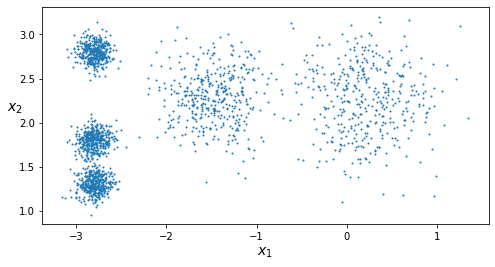

In [1]:
#Make some blobs
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
blob_centers = np.array(
    [[ 0.2, 2.3],
    [-1.5 , 2.3],
    [-2.8, 1.8],
    [-2.8, 2.8],
    [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
cluster_std=blob_std, random_state=7)

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

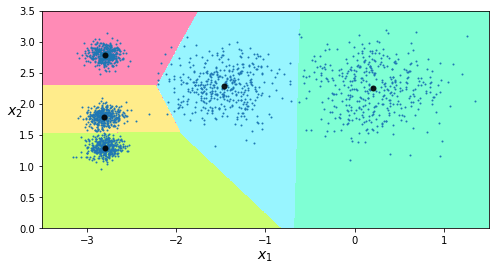

In [2]:
#Do some k-means (ten times to find the best)
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

k = 5
kmeans = KMeans(n_clusters=k, n_init=10)

x0, x1 = np.meshgrid(
    np.linspace(-3.5, 1.5, 1000).reshape(-1, 1),
    np.linspace(0, 3.5, 1000).reshape(-1, 1), )
X_new = np.c_[x0.ravel(), x1.ravel()]

kmeans.fit(X)
y_predict = kmeans.predict(X_new)

zz = y_predict.reshape(x0.shape) 

plt.figure(figsize=(8, 4))


custom_cmap = ListedColormap(
    ['#caff70','#98f5ff','#7fffd4', '#ece9ec', '#ff8bb6', '#ffec8b'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel(r'$X_1', fontsize=14)
plt.ylabel(r'$X_2', fontsize=14)
plot_clusters(X)
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], "ko", alpha=0.9, markeredgecolor='none')
plt.show()

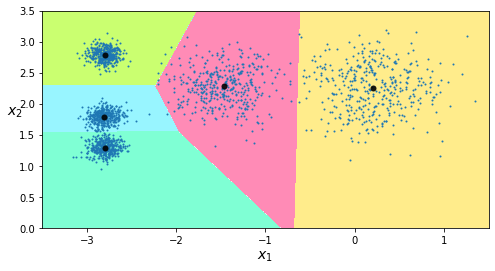

In [3]:
#Choose our own centers
kmeans = KMeans(n_clusters=5, init=np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]]), n_init=1)

x0, x1 = np.meshgrid(
    np.linspace(-3.5, 1.5, 1000).reshape(-1, 1),
    np.linspace(0, 3.5, 1000).reshape(-1, 1), )
X_new = np.c_[x0.ravel(), x1.ravel()]

kmeans.fit(X)
y_predict = kmeans.predict(X_new)

zz = y_predict.reshape(x0.shape) 

plt.figure(figsize=(8, 4))


custom_cmap = ListedColormap(
    ['#caff70','#98f5ff','#7fffd4', '#ece9ec', '#ff8bb6', '#ffec8b'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel(r'$X_1', fontsize=14)
plt.ylabel(r'$X_2', fontsize=14)
plot_clusters(X)
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], "ko", alpha=0.9, markeredgecolor='none')
plt.show()

In [4]:
#Soft classification too
kmeans.transform(X)

array([[1.45402521, 0.46779778, 0.11146795, 1.54944305, 3.04611916],
       [0.99002955, 0.07122059, 0.51431557, 1.48612753, 3.11541584],
       [4.09069201, 3.81713488, 3.76340605, 2.67154781, 1.32016676],
       ...,
       [0.06769209, 0.92830156, 1.42865797, 1.40795651, 3.04886464],
       [3.05913478, 3.10300136, 3.23385668, 1.71125   , 0.14895409],
       [0.85434589, 0.22700281, 0.67518173, 1.21678483, 2.8625311 ]])

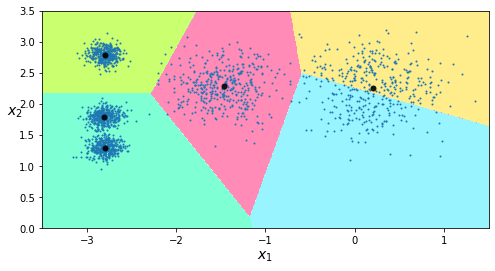

In [5]:
#Mini-batch K-means (watch out for bad performance)
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

x0, x1 = np.meshgrid(
    np.linspace(-3.5, 1.5, 1000).reshape(-1, 1),
    np.linspace(0, 3.5, 1000).reshape(-1, 1), )
X_new = np.c_[x0.ravel(), x1.ravel()]

minibatch_kmeans.fit(X)
y_predict = minibatch_kmeans.predict(X_new)

zz = y_predict.reshape(x0.shape) 

plt.figure(figsize=(8, 4))


custom_cmap = ListedColormap(
    ['#caff70','#98f5ff','#7fffd4', '#ece9ec', '#ff8bb6', '#ffec8b'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel(r'$X_1', fontsize=14)
plt.ylabel(r'$X_2', fontsize=14)
plot_clusters(X)
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], "ko", alpha=0.9, markeredgecolor='none')
plt.show()


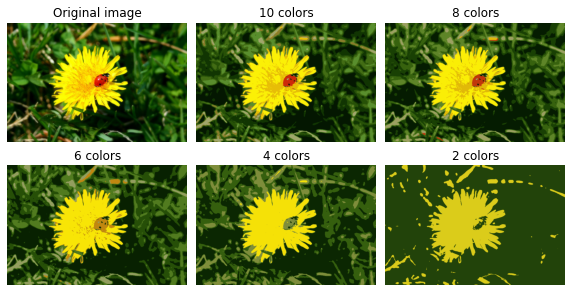

In [6]:
#Image segmentation using clustering
import os
images_path = os.path.join(os.path.abspath("unsupervised.ipynb"), "..")
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"

from six.moves import urllib

url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

from matplotlib.image import imread

image = imread(os.path.join(images_path, filename))

X = image.reshape(-1, 3)

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')
for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

In [7]:
#Kmeans for MNIST preprocessing
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print("Logistic Regression Score: "+str(log_reg.score(X_test, y_test)))

from sklearn.pipeline import Pipeline
pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=50)),
        ("log_reg", LogisticRegression()),
    ])
pipeline.fit(X_train, y_train)

#Do some grid search to figure out best params
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=0)
grid_clf.fit(X_train, y_train)

print("Best Grid Params: "+str(grid_clf.best_params_))

pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=grid_clf.best_params_['kmeans__n_clusters'])),
        ("log_reg", LogisticRegression()),
    ])
pipeline.fit(X_train, y_train)

print("Preprocessed Score: "+str(pipeline.score(X_test, y_test)
))

Logistic Regression Score: 0.9577777777777777
Best Grid Params: {'kmeans__n_clusters': 81}
Preprocessed Score: 0.9666666666666667


In [8]:
#Using DBSCAN clustering
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)


DBSCAN(eps=0.05)

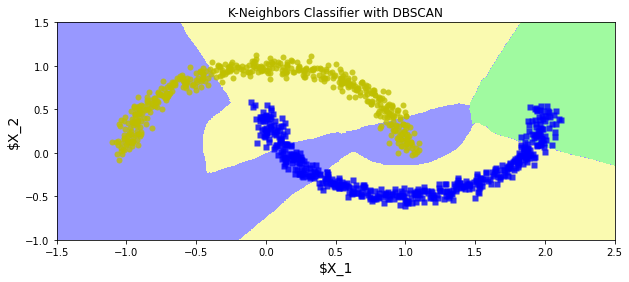

In [9]:
#Kneighbors with moons and the DBScan results
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

x0, x1 = np.meshgrid(
    np.linspace(-1.5, 2.5, 1000).reshape(-1, 1),
    np.linspace(-1, 1.5, 500).reshape(-1, 1), )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = knn.predict_proba(X_new)
y_predict = knn.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape) 

plt.figure(figsize=(10, 4))
plt.plot(X[y==1, 0], X[y==1, 1], "bs", alpha=0.8, markeredgecolor='none')
plt.plot(X[y==0, 0], X[y==0, 1], "yo", alpha=0.8, markeredgecolor='none')

from matplotlib.colors import ListedColormap


custom_cmap = ListedColormap(
    ['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel(r'$X_1', fontsize=14)
plt.ylabel(r'$X_2', fontsize=14)
plt.title("K-Neighbors Classifier with DBSCAN")
plt.show()

In [10]:
#Gaussian Mixture Modeling
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
X1, y1 = make_blobs(n_samples=500, centers=((4, -4), (0, 0), (-2,2)), random_state=42)

def plot_dataset(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b.")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g.")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "r.")
    plot_dataset(X1,y1)
    plt.show()

gm = GaussianMixture(n_components=3, n_init=50)
gm.fit(X1)

plot_dataset(X1,y1)

In [ ]:
#Generating new samples from GMM
X_new, y_new = gm.sample(3000)

plot_dataset(X_new, y_new)
plt.show()